In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from pykrige.rk import RegressionKriging
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging

from sklearn.linear_model import LinearRegression, BayesianRidge, TweedieRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Добавление шума
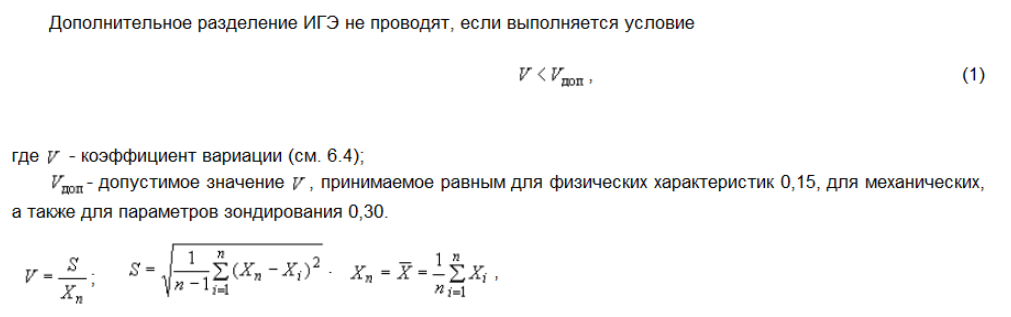

In [ ]:
def get_V(values):
    S = np.std(values, ddof=1)
    Xn = np.mean(values)
    return S/Xn

In [ ]:
def add_noise(data, n_mean, n_std, random_state=None):
    """
    Функция для добавления гауссовского шума к данным.
        :param data: numpy массив данных, к которым будет добавлен шум
        :param n_std: стандартное отклонение шума
        :return: numpy массив с добавленным шумом
    """
    # Установка random_state для воспроизводимости
    if random_state is not None:
        np.random.seed(random_state)
    # Генерируем шум с нормальным распределением
    noise = np.random.normal(n_mean, n_std, data.shape)
    # Добавляем шум к данным
    noise_data = data + noise
    return noise_data



original_data = np.array([1, 2, 3, 4, 5])
noise_data = add_noise(original_data, 0, 0.5, random_state=1234)
print("Оригинальные данные:", original_data)
print("Данные с шумом:", noise_data)

In [ ]:
class KriginAddNoise():

    def __init__(self, data, **kwargs):
        self.data = data
        
        self.list_random = kwargs.get(list_random, None)
        self.n_iter = kwargs.get(n_iter, None)
        self.krigin_name = kwargs.get(krigin_name, "UK")
        self.regress_model = kwargs.get(regress_model, LinearRegression())
        self.variogram_model = kwargs.get(variogram_model, "exponential")
        self.variogram_parameters = kwargs.get(variogram_parameters, None)
        self.n_closest_points = kwargs.get(n_closest_points, 10)

    def add_noise(self, n_mean, n_std, random_state=None):
        """
        Функция для добавления гауссовского шума к данным.
            :param data: numpy массив данных, к которым будет добавлен шум
            :param n_std: стандартное отклонение шума
            :return: numpy массив с добавленным шумом
        """
        if random_state is not None:
            np.random.seed(random_state)

        noise = np.random.normal(n_mean, n_std, self.data.shape)
        return self.data + noise

    def get_krigin_model(self, x_train, target_train, r_train=None):
        if self.krigin_name == "UK":
            model = UniversalKriging(x_train[:, 0], x_train[:, 1], target_train, 
                                     variogram_model=self.variogram_model, 
                                     variogram_parameters=self.variogram_parameters #{'sill':28, 'range': 50, 'nugget': 1}
                                     )
        elif self.krigin_name == "OK":
            model = OrdinaryKriging(x_train[:, 0], x_train[:, 1], target_train, 
                                     variogram_model=self.variogram_model, 
                                     variogram_parameters=self.variogram_parameters #{'sill':28, 'range': 50, 'nugget': 1}
                                     ) 
        elif self.krigin_name == "RK":
            model = RegressionKriging(regression_model=self.regress_model, 
                                      n_closest_points=self.n_closest_points,
                                      variogram_model=self.variogram_model,
                                      variogram_parameters=self.variogram_parameters
                                     )            
            model.fit(r_train, x_train, target_train)
        else:
            return None
        return model

    # def result_krigin(self, 
            
    # def exam_add_noise(self, n_mean, n_std):
    #     data_out()
        
    #     if list_random is not None:
    #         for i in range(len(list_random)):      